In [78]:
import matplotlib as mpl

fsize = 12
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (6,5)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import mpmath as mp

from scipy.special import legendre
from scipy.special import roots_legendre
from math import atan2

Potenical efectivo entre dos particulas $\alpha$

$V^{eff}(r) = V_C(r)+\bar{V}(r)+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2}$

$V_C(r) = \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{r} \text{, for } r\geq R_C \approx R_P+R_T =2R_\alpha$

$~~~~~~~~~~~= \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{2R_C}\left(3-\frac{r^2}{R_C^2}\right) \text{, for } r < R_C$

$\bar{V}(r) = -V_0e^{-r^2/\bar{R}^2}$

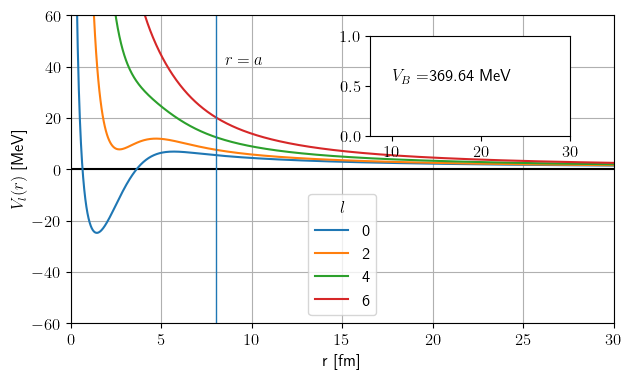

In [79]:
m_a_c2 = 3727.3794066 #MeV
m_p_c2 = 938.27208816 #MeV
m_12C_c2 = 12*931.49410242 #MeV

#mu_c2 = m_a_c2*m_a_c2/(m_a_c2+m_a_c2) #MeV
mu_c2 = m_p_c2*m_12C_c2/(m_p_c2+m_12C_c2) #MeV

hbar_c = 197.3269804 #MeV fm

hb2_2mu = (hbar_c**2)/(2*mu_c2)

R_C = 4.5 #fm == R_bar
V_0 = 60 #MeV

e2_4pie0 = 1.44 #MeV fm

N = 10 #Rep prog phys 73 (2010) 036301 12C+p
a = 8 #Rep prog phys 73 (2010) 036301 12C+p

hb2_2mua2 = hb2_2mu/(a**2)

def V_C(x):
    return 6*np.exp(2)/x #Rep prog phys 73 (2010) 036301 (4.14) 12C+p
    #if x>R_C:
    #    return 4*e2_4pie0/x
    #else:
    #    return e2_4pie0*(2/R_C)*(3-(x/R_C)**2)
    
def V_bar(x):
    return -73.8*np.exp(-(x/2.7)**2) #Rep prog phys 73 (2010) 036301 (4.14) 12C+p
    #return -V_0*np.exp(-(x/R_C)**2)

def V_eff(x, l):
    return V_C(x) + V_bar(x) + hb2_2mu*l*(l+1)/(x**2)

x = np.linspace(0.1, 30, 1000)

l_list = np.arange(0, 7, 2)
#l_list = [1]

fig, ax = plt.subplots(1,1, figsize=(7,4))

ax.axhline(y=0, color='k')

axins = inset_axes(ax, 2,1 , loc=1,bbox_to_anchor=(0.85, 0.85),bbox_transform=ax.figure.transFigure)

for l_id, l in enumerate(l_list):
    V_eff_values = np.vectorize(V_eff)(x, l)

    ax.plot(x, V_eff_values, label=str(l))
    axins.plot(x, V_eff_values)

    if l==0:
        index_max = np.argmax(V_eff_values)
        max_x = x[index_max]
        max_y = V_eff_values[index_max]
        axins.axvline(x=max_x, ymin=0, ymax=max_y)
        axins.text(x=10, y=0.55, s=r'$V_B=$'+str(round(max_y,2))+' MeV')

ax.axvline(x=a, ymin=-60, ymax=60, lw=1)
ax.text(x=a+0.5, y=41, s=r'$r=a$')

ax.set_xlabel(r'r [fm]')
ax.set_ylabel(r'$V_l(r)$ [MeV]')

ax.legend(title=r"$l$", loc='lower center')

ax.grid()

ax.set_xlim(0,30)
ax.set_ylim(-60,60)

# sub region of the original image
x1, x2, y1, y2 = 7.5, 30, 0, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#plt.yscale(value='log')

plt.savefig('V_l_eff.pdf', bbox_inches='tight')

funciones de Lagrange-Legendre

$\phi_i(r)=(-1)^{N+i}\left(\frac{r}{ax_i}\right)^n\sqrt{ax_i(1-x_i)}\frac{P_N(2r/a-1)}{r-ax_i}$

pagina 43: elementos de matriz cinética 

$\bra{\phi_i}T_0+L(0)\ket{\phi_i}=\frac{(4N^2+4N+3)x_i(1-x_i)-6x_i+1}{3a^2x_i^2(1-x_i)^2}$

$\bra{\phi_i}T_0+L(0)\ket{\phi_j}=\frac{(-1)^{i+j}}{a^2[x_ix_j(1-x_i)(1-x_j)]^{1/2}}\left[N^2+N+1+\frac{x_i+x_j-2x_ix_j}{(x_i-x_k)^2}-\frac{1}{1-x_i}-\frac{1}{1-x_j}\right]$

[0.01304674 0.06746832 0.16029522 0.2833023  0.42556283 0.57443717
 0.7166977  0.83970478 0.93253168 0.98695326]


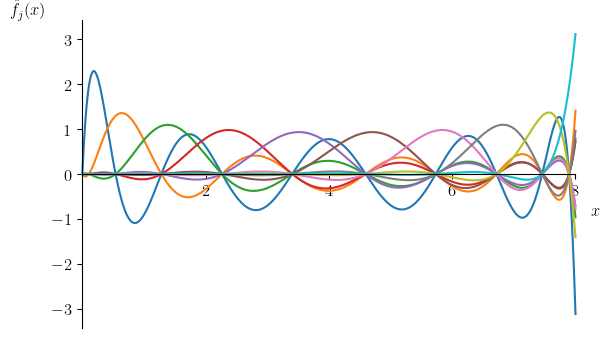

In [80]:
x = np.linspace(0, a, 1000)

#List of all Laguerre polynomial zeroes
Legendre_zeroes = (roots_legendre(N)[0]+1)/2
print(Legendre_zeroes)

def Lagrange_Legendre(x, x_j, j, N, a, n=1):
    return (-1)**(N+j) * (x/(a*x_j))**n * np.sqrt(a*x_j*(1-x_j)) * (legendre(N)((2*x/a)-1) / (x - a*x_j))

f_N = [Lagrange_Legendre(x, Legendre_zeroes[i-1], i, N, a) for i in range(1,N+1)]

# print(roots_laguerre(4)[0])
fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(0, N):
    ax.plot(x, f_N[i])

#ax.set_ylim(-1,1.5)
ax.set_ylabel(r'$\hat{f}_j(x)$', loc='top', rotation=0)
ax.set_xlabel(r'$x$', loc='right')

x_major = [a/4, a/2, 3*a/4, a]
ax.set_xticks(x_major)

# set the y-spine
ax.spines['left'].set_position('zero') # set left spine to y=0
ax.spines['right'].set_color('none') # turn off the right spine/ticks
ax.yaxis.tick_left()

# set the x-spine
ax.spines['bottom'].set_position('zero') # set bottom spine to x=0
ax.spines['top'].set_color('none') # turn off the top spine/ticks
ax.xaxis.tick_bottom()
ax.spines['bottom'].set_bounds((0, x_major[-1]))

plt.savefig('f_hat.pdf', bbox_inches='tight')

In [81]:
#construcción de la matriz C

def C_ij(i, j, a, N, l):
    Legendre_zeroes = (roots_legendre(N)[0]+1)/2
    x_i = Legendre_zeroes[i-1]

    T_L_ij = 0
    V_ij = 0

    if i==j:
        T_L_ij = hb2_2mua2*(((2*N)**2+4*N+3)*x_i*(1-x_i) - 6*x_i + 1)/(3*x_i**2 * (1-x_i)**2)
        V_ij = V_eff(a*x_i, l)
    else:
        x_j = Legendre_zeroes[j-1]
        A1 = (-1)**(i-j)/(x_i*x_j*(1-x_i)*(1-x_j))**(0.5)
        A2 = N**2 + N + 1 + ((x_i+x_j-2*x_i*x_j)/(x_i-x_j)**2) - 1/(1-x_i) - 1/(1-x_j)
        T_L_ij = A1 * A2
    
    return hb2_2mua2*T_L_ij+V_ij

In [82]:
#construcción de R matriz

def R_l(C_matrix, f_N, a):
    B = hb2_2mu/a

    C_inv = np.linalg.inv(C_matrix)

    #sum =  f_N.dot(C_inv.dot(f_N))
    sum = np.linalg.multi_dot([f_N, C_inv, f_N])

    return B*sum

eta = 0.19203608849863893


(-2.0, 2.0)

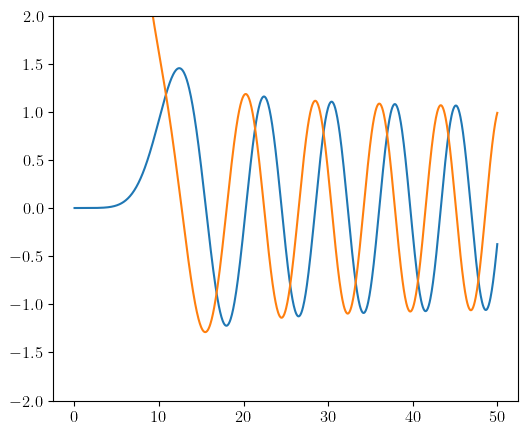

In [83]:
l = 10
Z_1 = 2 #Z_alpha
Z_2 = 2 #Z_alpha
e2 = 1.44 #MeV fm
mu_c2

E = 10

eta = (Z_1*Z_2*e2/hbar_c)*np.sqrt(mu_c2/(2*E))
print("eta =", eta)

F = np.vectorize(lambda x: mp.coulombf(0,5,x))
G = np.vectorize(lambda x: mp.coulombg(0,5,x))

x = np.linspace(0.01,50, 1000)
plt.plot(x, np.array([F(x), G(x)]).T)
plt.ylim(-2,2)

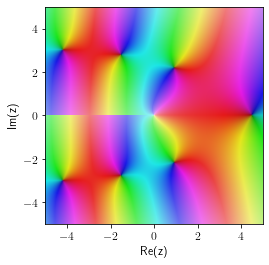

In [14]:

mp.cplot(lambda z: mp.coulombg(1,1,z), points=50000)

In [85]:
l = 10
Z_1 = 1 #Z_p
#Z_2 = 2 #Z_a
Z_2 = 6 #Z_12C
e2 = 1.44 #MeV fm

Energy_values = np.arange(1, 150.1, 1) #MeV
#Energy_values = [10]

C_matrix = np.zeros((N,N)) #define partial C-matrix
for m in range(1, N+1):
    C_matrix[m-1] = np.array([C_ij(m, n, a, N, l) for n in range(1, N+1)])

#print(C_matrix)

S_l_values = list()

for E in Energy_values:

    eta = (Z_1*Z_2*e2/hbar_c)*np.sqrt(mu_c2/(2*E))
    #print(eta)

    C_matrix -= E*np.eye(N) #substract E from C_matrix diagonal
    #print(C_matrix)

    F = np.vectorize(lambda r: mp.coulombf(l,eta,r))
    G = np.vectorize(lambda r: mp.coulombg(l,eta,r))

    def H_l_minus(rho):
        return G(rho) - 1j*F(rho)

    def H_l_plus(rho):
        return G(rho) + 1j*F(rho)

    def S_l(Energy):

        k = np.sqrt(2*mu_c2*Energy)/hbar_c
        rho = k*a

        f_N = np.array([Lagrange_Legendre(a, Legendre_zeroes[i-1], i, N, a, n=1) for i in range(1,N+1)])

        R_matrix = R_l(C_matrix, f_N, a)
        #print(R_matrix)

        numerator = -(rho*R_matrix*mp.diff(H_l_minus, rho) - H_l_minus(rho))
        denominator = rho*R_matrix*mp.diff(H_l_plus, rho) - H_l_plus(rho)

        return numerator/denominator
    
    S_l_values.append(S_l(E))

#print(S_l_values)

#print(atan2(S_l_values[0].imag, S_l_values[0].real))

d_l_values = np.array([np.real(mp.ln(s)/(2j)) for s in S_l_values])
#print(d_l_values[0])

#d_l_values = [atan2(s.imag, s.real) for s in S_l_values]
#d_l_values = np.array([2*np.pi-d if d<0 else d for d in d_l_values])
#d_l_values = d_l_values/2

print(d_l_values)

#plt.plot(Energy_values, d_l_values/np.pi)
#plt.axhline(2*np.pi)


[mpf('1.5707963267948961') mpf('1.5707963267934475')
 mpf('1.5707963266861058') mpf('1.5707963248415269')
 mpf('1.5707963111186383') mpf('1.5707962576310244')
 mpf('1.5707961959989378') mpf('-1.5707956454126109')
 mpf('-1.5707851490154143') mpf('-1.5702764242439564')
 mpf('1.5706214826834362') mpf('1.5705883945008252')
 mpf('1.5705179934776299') mpf('1.5705086505118009')
 mpf('-1.5704782993133153') mpf('-1.5227360809120749')
 mpf('1.5633803351381601') mpf('1.5630738002540416')
 mpf('1.5612019405437225') mpf('1.5584676539363798')
 mpf('1.555042017271276') mpf('1.5512331582364838')
 mpf('1.5480797172530223') mpf('1.5502574756442233')
 mpf('-1.5165173003691814') mpf('1.4503680559361984')
 mpf('1.4649378960165138') mpf('1.4558028943951655')
 mpf('1.4406174933153855') mpf('1.4220327654471745')
 mpf('1.4009085502939884') mpf('1.3776897423837324')
 mpf('1.3527162402159272') mpf('1.3263302949021505')
 mpf('1.2989365044926879') mpf('1.2710612389436784')
 mpf('1.2434414301670671') mpf('1.2171866

[mpf('0.49999999999999983') mpf('0.49999999999953876')
 mpf('0.49999999996537081') mpf('0.49999999937822309')
 mpf('0.49999999501009201') mpf('0.49999997798445572')
 mpf('0.49999995836635325') mpf('-0.49999978310928217')
 mpf('-0.49999644200228521') mpf('-0.49983450987818356')
 mpf('0.49994434539078114') mpf('0.49993381309514023')
 mpf('0.49991140375345966') mpf('0.49990842979507005')
 mpf('-0.49989876870853456') mpf('-0.48470194860307403')
 mpf('0.49763941653980426') mpf('0.49754184345572916')
 mpf('0.49694601200438548') mpf('0.49607566154560834')
 mpf('0.49498524752863216') mpf('0.49377285004277732')
 mpf('0.49276907860224439') mpf('0.49346228062788339')
 mpf('-0.48272244927626362') mpf('0.4616664908096571')
 mpf('0.46630421494733831') mpf('0.46339645362095816')
 mpf('0.45856279033159819') mpf('0.45264708771911122')
 mpf('0.44592304119797865') mpf('0.4385322650947418')
 mpf('0.43058295246209705') mpf('0.42218404521241704')
 mpf('0.41346433090503842') mpf('0.40459135830079024')
 mpf('

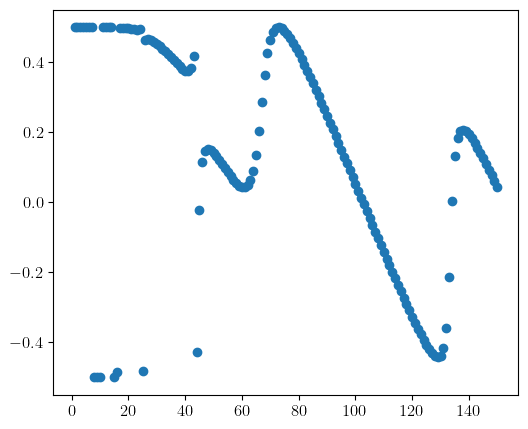

In [86]:
new_dl = d_l_values/np.pi
print(new_dl)
plt.scatter(Energy_values, new_dl)

7.0
10.0
14.0
16.0
24.0
25.0
43.0


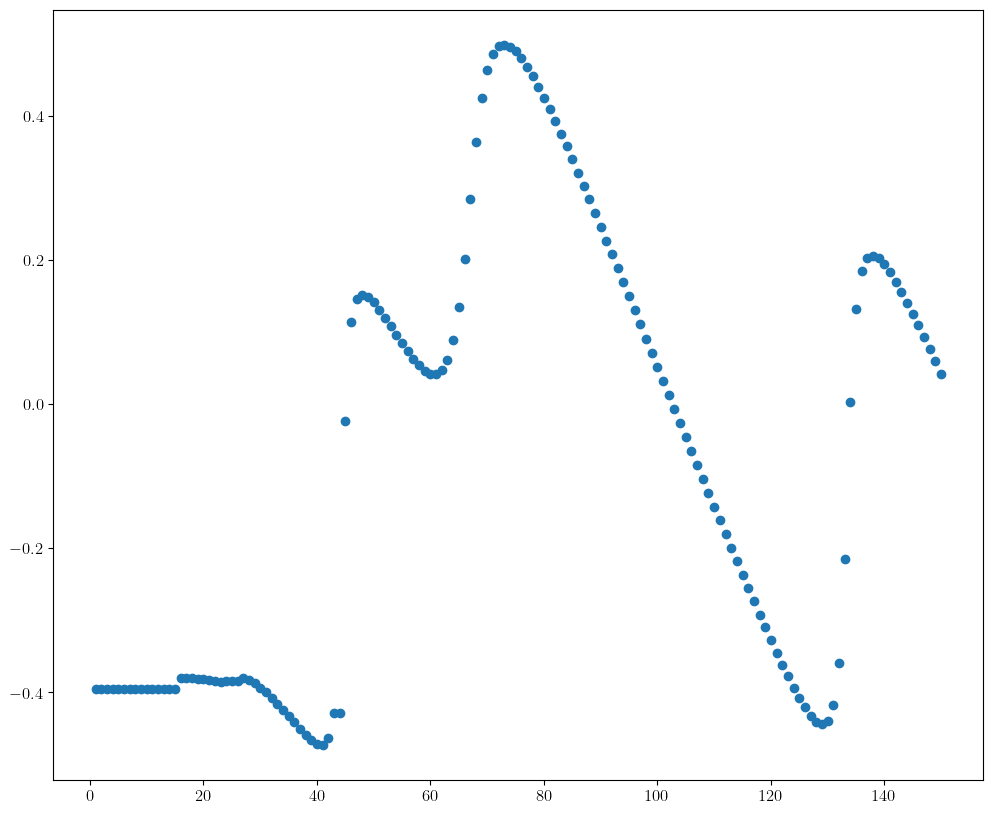

In [87]:
mpl.rcParams["figure.figsize"] = (12,10)

indexes = list()
differences = list()
for i in range(len(new_dl)-1):
    diff = new_dl[i+1]-new_dl[i]
    if np.abs(diff) > 0.5:
        indexes.append(i)
        differences.append(diff)
        print(Energy_values[i])

for ind, index in enumerate(indexes):
    differences[ind] = new_dl[index+1]-new_dl[index]
    #for i in range(index+1):
    new_dl[:index+1] += differences[ind]

plt.scatter(Energy_values, new_dl)